In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
figsize(30,20)

In [3]:
import numpy as np

In [4]:
# Samples per ms
smplr = 2000
minPktLen = 100

In [8]:
bin = np.fromfile('test-SF11-FU.complexfloat32', dtype=np.complex64)#[900*smplr:1000*smplr]
abin = abs(bin)

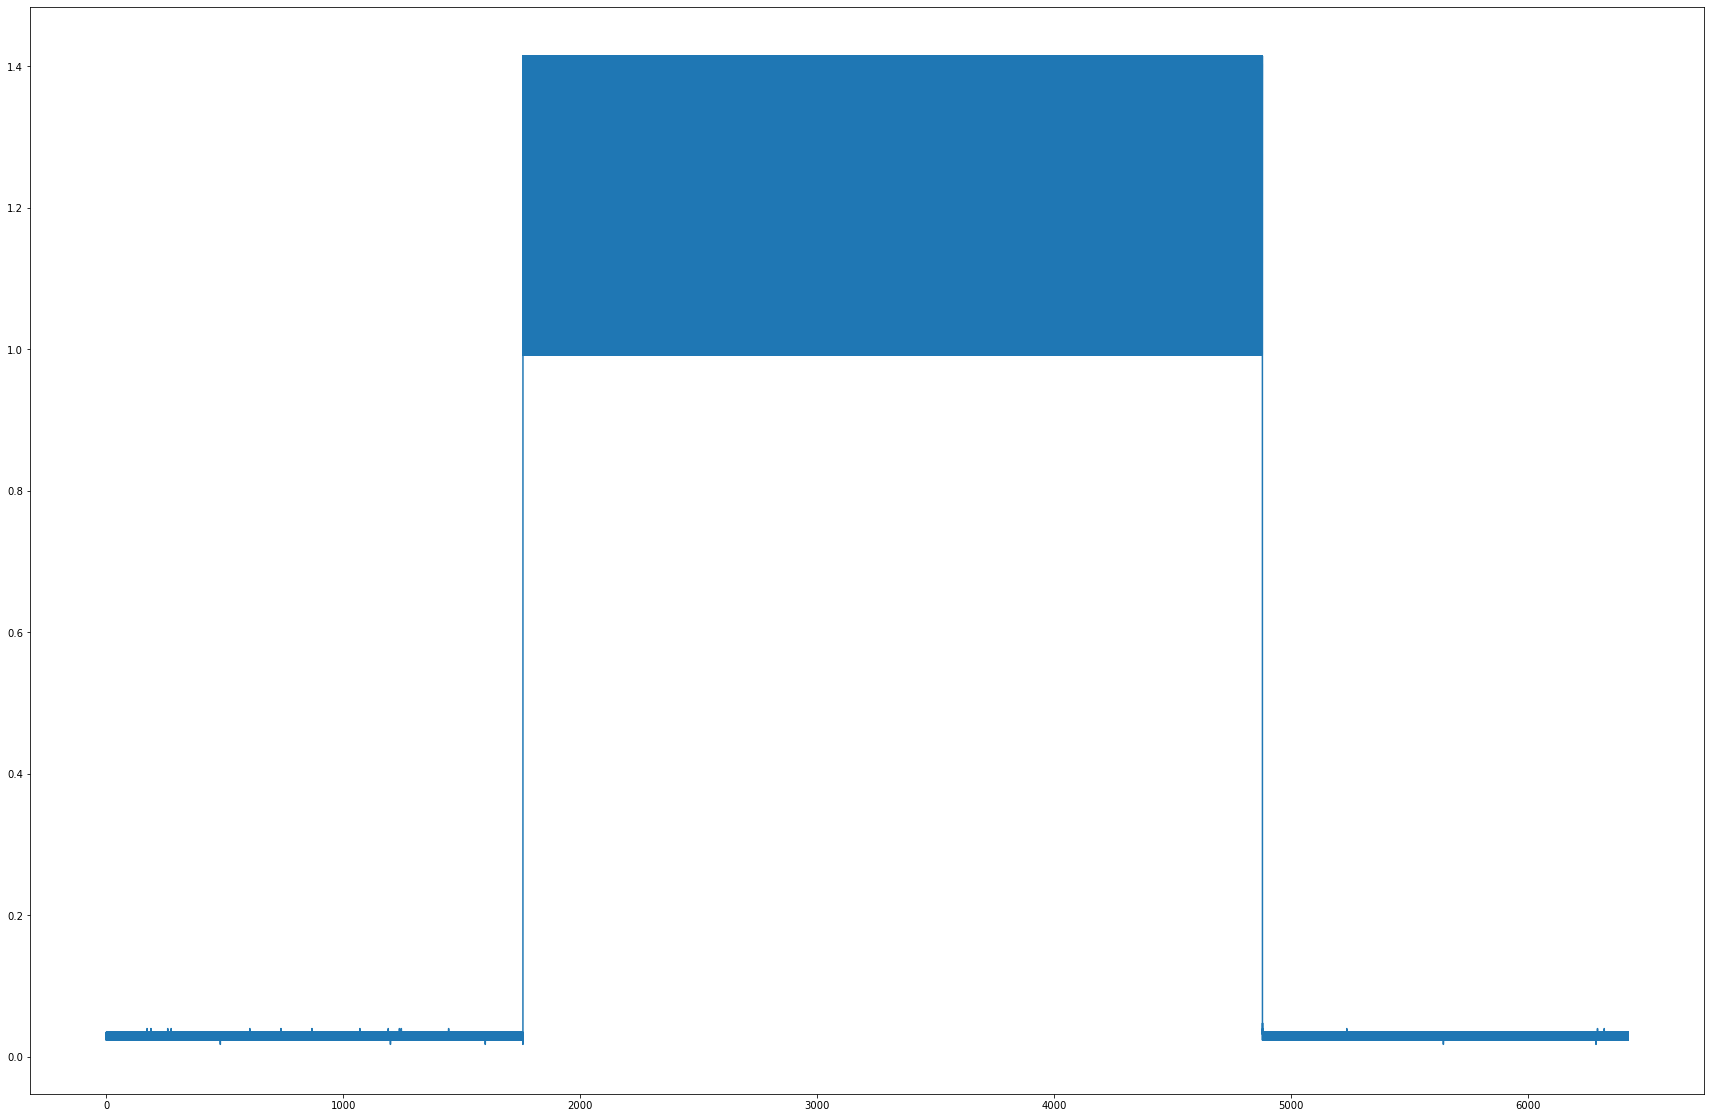

In [9]:
plot(np.array(range(len(abin)))/smplr, abs(abin))

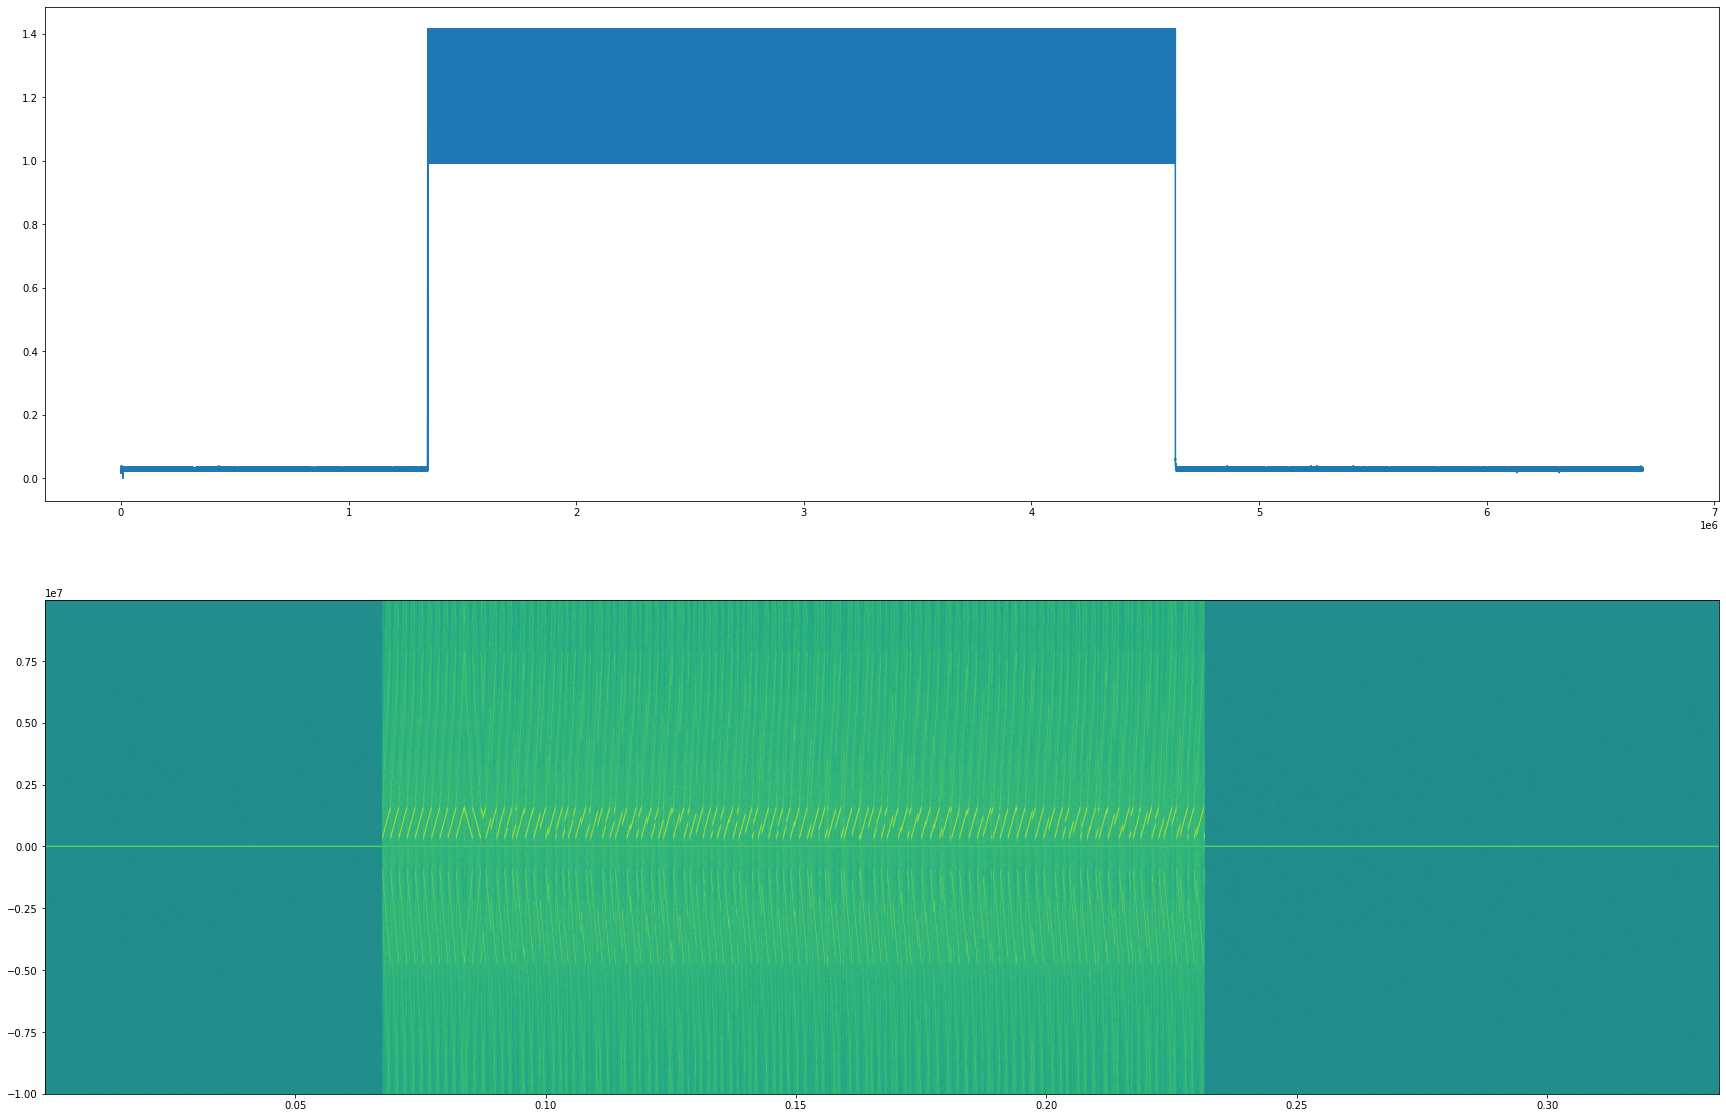

In [7]:
import matplotlib.pyplot as plt
NFFT = 1024  # the length of the windowing segments
Fs = 20e6  # the sampling frequency
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(np.array(range(len(abin))), abin)
Pxx, freqs, bins, im = ax2.specgram(bin, NFFT=NFFT, Fs=Fs, noverlap=900)

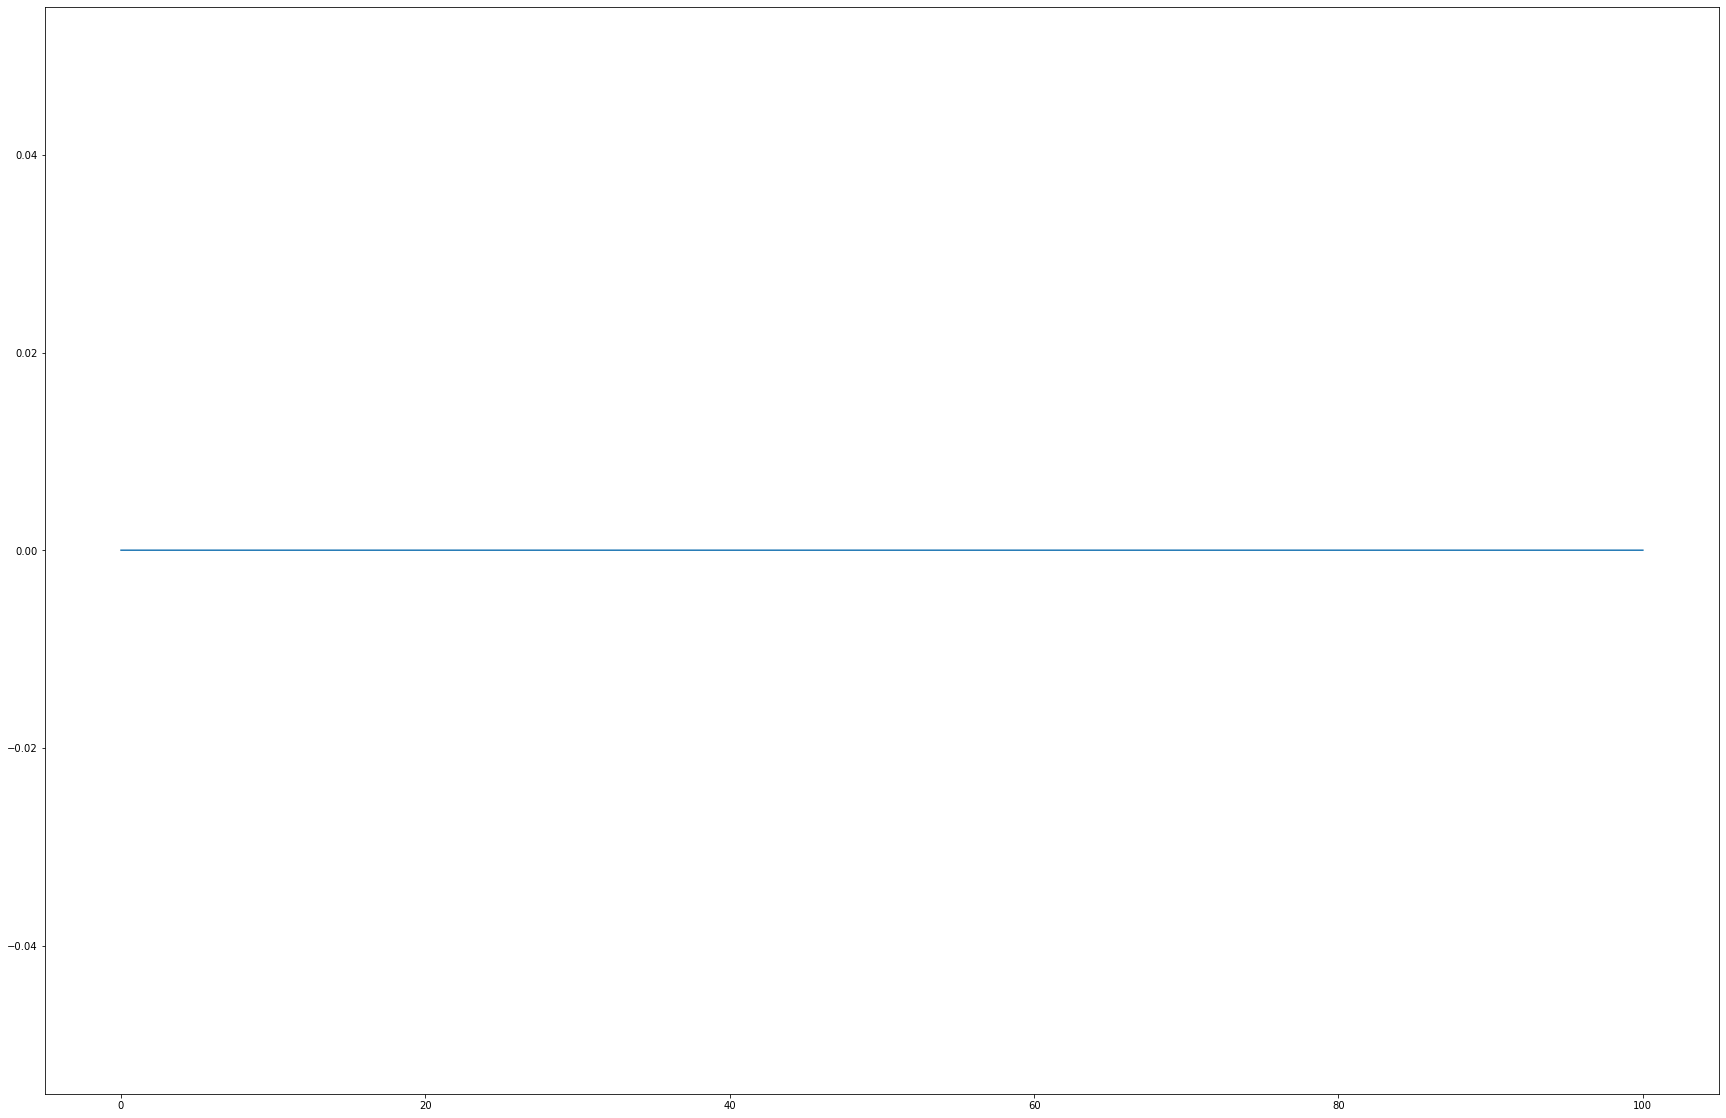

In [22]:
bbin = abin>0.2
plot(np.array(range(len(bin)))/smplr, bbin)

In [23]:
d = dict()
start = 0
for i in range(1,len(bbin)):
    if (not bbin[i-1]) and bbin[i]:
        start = i
    elif bbin[i-1] and (not bbin[i]):
        if(i-start > minPktLen):
            d[start/smplr] = (i-start)/smplr
print(d)

{}
